# Main Ingredients

Now that you have learned many of the fundamental procedures executed in deep learning models, the notebooks that follow will provide various examples using the Python API. These notebooks are designed to closely mirror the complementary R notebooks.

In [3]:
# utility packages
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:

# modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

## Simple Linear Regression

In [5]:
n = 1000   # n observations
b = 30     # intercept
a = 5      # slope

In [6]:
random.seed(123)
X = [random.uniform(-1, 1) for ob in range(n)]
y = [b + a*ob + random.uniform(-1, 1) for ob in X]

df = pd.DataFrame({'X': X, 'y': y})
df.head()

,X,y
0,-0.895273,24.651331
1,-0.825627,26.812954
2,-0.185516,29.257534
3,-0.784600,26.488911
4,0.802398,34.809165


<AxesSubplot:xlabel='X', ylabel='y'>

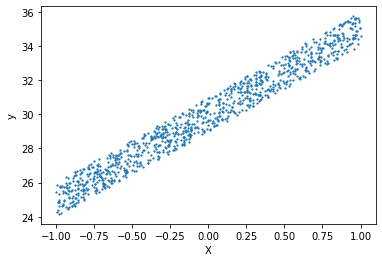

In [7]:
df.plot.scatter(x='X', y='y', s=1.5)

In [8]:
X = df[['X']]
y = df['y']

reg = LinearRegression().fit(X, y)

print(f'''
estimated intercept = {reg.coef_}
estimated slope = {reg.intercept_}
loss score = {mean_squared_error(y, reg.predict(X))}
''')


estimated intercept = [5.03266661]
estimated slope = 29.99919365105621
loss score = 0.33470234042376534



## Simple regression with a perceptron

In [32]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1))

# compile the keras model
model.compile(loss='mse', optimizer='sgd')

# Fit the model
model.fit(X, y, batch_size=2**10, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 162ms/step - loss: 901.3398
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 866.0397
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 832.1336
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 799.5662
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 768.2847
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 738.2380
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 709.3773
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 681.6556
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 655.0279
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 629.4509
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 604.8828
Epoch 12/15
1/1 [==============================] - 0s 9ms/step - loss: 581.2839
Epoch 13/15
1/1 [==============================

2022-11-21 09:05:37.844362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step - loss: 515.9259


In [18]:
model.get_weights()

[array([[4.737358]], dtype=float32), array([29.979565], dtype=float32)]

## Binary Classification

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=1)

In [ ]:
pd.DataFrame({'X': np.squeeze(X), 'y': y}).head()

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd')

# fit the model
history = model.fit(X, y, epochs=50, verbose=False)

In [ ]:
model.evaluate(X, y)

In [ ]:
pd.DataFrame({
    'epoch': history.epoch,
    'loss': history.history['loss']
}).plot.scatter(x='epoch', y='loss')

## Learning rate and momentum

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.2))

# fit the model
model.fit(X, y, epochs=10)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.5))

# fit the model
model.fit(X, y, epochs=10)

## Non-linear Patterns

In [ ]:
df = pd.DataFrame({
    'X': np.arange(0, 6, 0.01),
    'y': np.sin(np.arange(0, 6, 0.01))
})

# add random noise to response variable
e = np.random.uniform(-0.2, 0.2, (df.shape[0], 1))
df[['y']] = df[['y']] + e

# plot
df.plot.scatter(x='X', y='y', s=1.5)

In [ ]:
X = df[['X']]
y = df['y']

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation = "relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=32, epochs=50, verbose=False)

In [ ]:
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=16, epochs=50, verbose=False)
          
# plot results
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

## Multi-predictor Multi-class Classification

In [ ]:
X, y = make_blobs(n_samples=2000, centers=4, n_features=3)

In [ ]:
# categorical encoding of y array
y = utils.to_categorical(y)
y

In [ ]:
X.shape[1]

In [ ]:
y.shape

### Fit model using validation

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(units=y.shape[1], activation='softmax'))

# compile the keras model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics='accuracy'
)

# fit the model
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2, verbose=False)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()